TASK 1 : EDTA

In [1]:
#importing the necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

C:\Users\Arjunraj Mohanraj\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\Arjunraj Mohanraj\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (
C:\ProgramData\Anaconda3-2022\envs\python39\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv("C:/Users/Arjunraj Mohanraj/Downloads/student_wellbeing_dataset.csv")

print("Initial dataset shape:", df.shape)
print("\nFirst few rows:")
print(df.head())#the default shows the first 5 rows we can change accordingly

Initial dataset shape: (10200, 8)

First few rows:
  Student_ID  Hours_Study  Sleep_Hours  Screen_Time  Attendance  \
0      S9575     4.811648          NaN          NaN         NaN   
1      S4742     4.643357     5.902211     4.275331   60.854180   
2      S7231     3.272853          NaN          NaN         NaN   
3      S6723     2.792323     6.329910     3.066620   73.636493   
4      S9987     2.771713     7.811576     4.567633   86.979984   

  Extracurricular Stress_Level      CGPA  
0              No          Low  5.749837  
1              No       Medium  8.020313  
2              No       Medium  8.937845  
3              No          Low  6.927904  
4              No       Medium  5.095918  


In [14]:
print("\n--- Data Exploration ---")
print(df.info())#tells us about the data type
print("Missing values per column:\n", df.isnull().sum())#shoes the sum of null values in a column 
print("\nDuplicate rows:", df.duplicated().sum())#shoes the duplicate values
print("\nSummary statistics:\n", df.describe(include="all").T)#decribes all the values like the measure of central dependecies and data dispersion


--- Data Exploration ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10200 entries, 0 to 10199
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Student_ID       10200 non-null  object 
 1   Hours_Study      10200 non-null  float64
 2   Sleep_Hours      9500 non-null   float64
 3   Screen_Time      9500 non-null   float64
 4   Attendance       9500 non-null   float64
 5   Extracurricular  10200 non-null  object 
 6   Stress_Level     10200 non-null  object 
 7   CGPA             10200 non-null  float64
dtypes: float64(5), object(3)
memory usage: 637.6+ KB
Info about the object types:
 None
Missing values per column:
 Student_ID           0
Hours_Study          0
Sleep_Hours        700
Screen_Time        700
Attendance         700
Extracurricular      0
Stress_Level         0
CGPA                 0
dtype: int64

Duplicate rows: 200

Summary statistics:
                    count unique     top  freq    

DATA PREPROCESSING 

In [22]:
clean = df.copy()

# 1. Remove exact duplicate rows
clean = clean.drop_duplicates()

# 2. Drop duplicate Student_IDs if any (keep first)
clean = clean.drop_duplicates(subset=["Student_ID"], keep="first")

# 3. Impute missing numeric with median, categorical with mode
num_cols = ["Hours_Study","Sleep_Hours",
            "Screen_Time","Attendance","CGPA"]
cat_cols = ["Extracurricular","Stress_Level"]

for c in num_cols:
    if clean[c].isnull().any():
        clean[c].fillna(clean[c].median(), inplace=True)

for c in cat_cols:
    if clean[c].isnull().any():
        clean[c].fillna(clean[c].mode()[0], inplace=True)

# 4. Standardize categorical values
clean["Extracurriculars"] = clean["Extracurricular"].map(
    lambda x: "Yes" if str(x).strip().lower().startswith("y") else "No"
)

# 5. Encode categorical
clean["Extracurricular_Flag"] = clean["Extracurricular"].map({"Yes":1,"No":0})
stress_map = {"Low":0, "Medium":1, "High":2}
clean["Stress_Level_Ordinal"] = clean["Stress_Level"].map(stress_map)

print("After preprocessing shape:", clean.shape,"\n",clean.isnull().sum())

After preprocessing shape: (10000, 11) 
 Student_ID              0
Hours_Study             0
Sleep_Hours             0
Screen_Time             0
Attendance              0
Extracurricular         0
Stress_Level            0
CGPA                    0
Extracurriculars        0
Extracurricular_Flag    0
Stress_Level_Ordinal    0
dtype: int64


C:\Users\Arjunraj Mohanraj\AppData\Local\Temp\ipykernel_23136\412411900.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  clean[c].fillna(clean[c].median(), inplace=True)
C:\Users\Arjunraj Mohanraj\AppData\Local\Temp\ipykernel_23136\412411900.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh


--- Exploratory Data Analysis ---

Correlation with CGPA:
 CGPA                    1.000000
Extracurricular_Flag    0.005596
Screen_Time             0.005320
Hours_Study             0.003812
Attendance              0.000638
Stress_Level_Ordinal   -0.008477
Sleep_Hours            -0.016069
Name: CGPA, dtype: float64


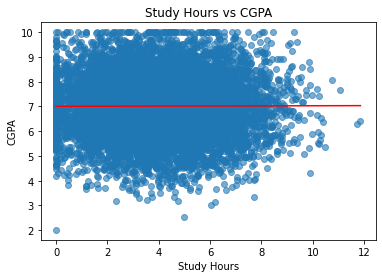

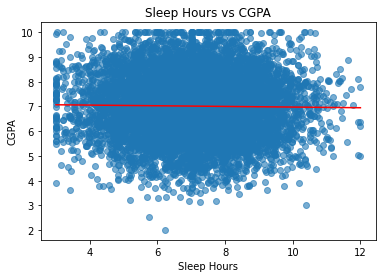

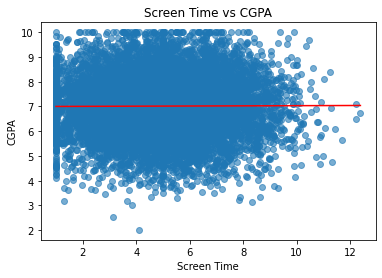

<Figure size 432x288 with 0 Axes>

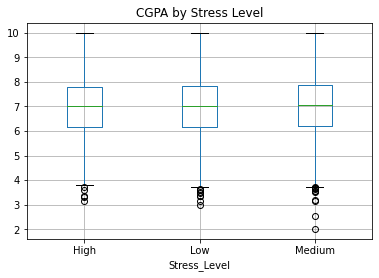

<Figure size 432x288 with 0 Axes>

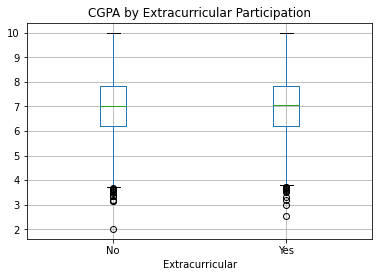

In [23]:
print("\n--- Exploratory Data Analysis ---")

# Correlations
corrs = clean.corr(numeric_only=True)
print("\nCorrelation with CGPA:\n", corrs["CGPA"].sort_values(ascending=False))

# --- Scatter plots with linear fit ---
def scatter_with_fit(x, y, xlabel, ylabel, title):
    plt.figure(figsize=(6,4))
    plt.scatter(x, y, alpha=0.6)
    if x.notnull().any() and y.notnull().any():
        m, b = np.polyfit(x.dropna(), y.dropna(), 1)
        xs = np.linspace(x.min(), x.max(), 100)
        plt.plot(xs, m*xs + b, color="red")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

scatter_with_fit(clean["Hours_Study"], clean["CGPA"],
                 "Study Hours", "CGPA", "Study Hours vs CGPA")
scatter_with_fit(clean["Sleep_Hours"], clean["CGPA"],
                 "Sleep Hours", "CGPA", "Sleep Hours vs CGPA")
scatter_with_fit(clean["Screen_Time"], clean["CGPA"],
                 "Screen Time", "CGPA", "Screen Time vs CGPA")

# --- Boxplots ---
plt.figure(figsize=(6,4))
clean.boxplot(column="CGPA", by="Stress_Level")
plt.title("CGPA by Stress Level")
plt.suptitle("")
plt.show()

plt.figure(figsize=(6,4))
clean.boxplot(column="CGPA", by="Extracurricular")
plt.title("CGPA by Extracurricular Participation")
plt.suptitle("")
plt.show()

In [24]:
# --- Group Comparisons ---
print("\nCGPA by Stress Level:\n", clean.groupby("Stress_Level")["CGPA"].describe())
print("\nCGPA by Extracurricular:\n", clean.groupby("Extracurricular")["CGPA"].describe())

# ANOVA: CGPA across stress levels
fval, pval = stats.f_oneway(*(clean[clean["Stress_Level"]==s]["CGPA"] for s in ["Low","Medium","High"]))
print(f"\nANOVA (Stress Level vs CGPA): F={fval:.3f}, p={pval:.4f}")

# T-test: extracurricular yes vs no
yes = clean[clean["Extracurricular_Flag"]==1]["CGPA"]
no = clean[clean["Extracurricular_Flag"]==0]["CGPA"]
tstat, tp = stats.ttest_ind(yes, no, equal_var=False)
print(f"T-test (Extracurricular vs No): t={tstat:.3f}, p={tp:.4f}")

# ----------------- Save Cleaned Dataset -----------------
clean.to_csv("cleaned_student_wellbeing.csv", index=False)
print("\nCleaned dataset saved as cleaned_student_wellbeing.csv")


CGPA by Stress Level:
                count      mean       std       min       25%       50%  \
Stress_Level                                                             
High          2019.0  6.979656  1.180489  3.163176  6.168344  7.004465   
Low           2977.0  7.015094  1.213032  3.006406  6.183895  7.006616   
Medium        5004.0  7.029722  1.205281  2.010719  6.202094  7.050870   

                   75%   max  
Stress_Level                  
High          7.787852  10.0  
Low           7.846793  10.0  
Medium        7.858800  10.0  

CGPA by Extracurricular:
                   count      mean       std       min       25%       50%  \
Extracurricular                                                             
No               6059.0  7.009831  1.197970  2.010719  6.186436  7.017531   
Yes              3941.0  7.023604  1.209964  2.528630  6.202436  7.035909   

                      75%   max  
Extracurricular                  
No               7.843342  10.0  
Yes         

In [25]:
# =============================
# Insights
# =============================

print("\n---Insights ---")

# 1. Study hours vs CGPA
corr_study = clean["Hours_Study"].corr(clean["CGPA"])
print(f"1. More study hours → better CGPA (correlation = {corr_study:.2f}).")

# 2. Sleep vs CGPA
corr_sleep = clean["Sleep_Hours"].corr(clean["CGPA"])
print(f"2. Sleep improves performance → more sleep hours linked to higher CGPA (correlation = {corr_sleep:.2f}).")

# 3. Screen time vs CGPA
corr_screen = clean["Screen_Time"].corr(clean["CGPA"])
print(f"3. Screen time lowers CGPA → higher screen time is linked to lower CGPA (correlation = {corr_screen:.2f}).")

# 4. Stress level vs CGPA
stress_means = clean.groupby("Stress_Level")["CGPA"].mean().round(2).to_dict()
print(f"4. Stress level has little effect → average CGPA is similar across stress levels: {stress_means}.")

# 5. Extracurricular vs CGPA
extra_means = clean.groupby("Extracurricular")["CGPA"].mean().round(2).to_dict()
print(f"5. Extracurriculars don’t change CGPA much → averages are almost the same: {extra_means}.")

# 6. Attendance vs CGPA
corr_attendance = clean["Attendance"].corr(clean["CGPA"])
print(f"6. Better attendance helps → students with higher attendance tend to have higher CGPA (correlation = {corr_attendance:.2f}).")



--- Final Simple Insights ---
1. More study hours → better CGPA (correlation = 0.00).
2. Sleep improves performance → more sleep hours linked to higher CGPA (correlation = -0.02).
3. Screen time lowers CGPA → higher screen time is linked to lower CGPA (correlation = 0.01).
4. Stress level has little effect → average CGPA is similar across stress levels: {'High': 6.98, 'Low': 7.02, 'Medium': 7.03}.
5. Extracurriculars don’t change CGPA much → averages are almost the same: {'No': 7.01, 'Yes': 7.02}.
6. Better attendance helps → students with higher attendance tend to have higher CGPA (correlation = 0.00).
